# Import Packages

In [68]:
import json
import os
import pandas as pd
import numpy as np
import pychartjs
from datetime import datetime 
import matplotlib.pyplot as plt
import re
import altair as alt
import seaborn as sns

# Load Data

In [81]:
output_dir = "output_data/"
file = "response3.pki"
raw_data = pd.read_pickle(output_dir + file)
raw_data = raw_data[["time", "Log ID", "Machine ID", "command", "stderr", "stdout"]]
raw_data

,time,Log ID,Machine ID,command,stderr,stdout
0,2021-04-19 19:34:00,490cd3ad601e875614199fc11aa5ebe2ad67d289cbe519...,10bcd15c,ls,,SuperShell\nstderr.txt
1,2021-04-19 19:35:00,490cd3ad601e875614199fc11aa5ebe2ad67d289cbe519...,10bcd15c,export,/home/supershell/.offline.sh: line 358: export...,
2,2021-04-19 19:35:00,490cd3ad601e875614199fc11aa5ebe2ad67d289cbe519...,10bcd15c,export,/home/supershell/.offline.sh: line 358: export...,
3,2021-04-19 19:36:00,490cd3ad601e875614199fc11aa5ebe2ad67d289cbe519...,10bcd15c,export,,
4,2021-04-19 19:36:00,490cd3ad601e875614199fc11aa5ebe2ad67d289cbe519...,10bcd15c,export,,
...,...,...,...,...,...,...
468,2021-04-17 19:57:00,00206cd4bdc39bab7e2908eb900370094d721883f30148...,612c4dc4-ce35-4571-952d-cfedc92809d3-5fbf7c6db6-n,ls,,_15881.env\n_15881.variables\nfastx_out\nfx486...
469,2021-04-17 19:57:00,00206cd4bdc39bab7e2908eb900370094d721883f30148...,612c4dc4-ce35-4571-952d-cfedc92809d3-5fbf7c6db6-n,cd,,
470,2021-04-17 19:57:00,00206cd4bdc39bab7e2908eb900370094d721883f30148...,612c4dc4-ce35-4571-952d-cfedc92809d3-5fbf7c6db6-n,ls,,job-48632\njob-48633\njob-48634\njob-48635\njo...
471,2021-04-17 19:57:00,00206cd4bdc39bab7e2908eb900370094d721883f30148...,612c4dc4-ce35-4571-952d-cfedc92809d3-5fbf7c6db6-n,pwd,,/home/jovyan/DNASubway/project-5974


In [82]:
raw_data.describe()

<ipython-input-82-7a57e84b5e52>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  raw_data.describe()


,time,Log ID,Machine ID,command,stderr,stdout
count,473,473,473,473,473,473
unique,166,9,7,31,44,140
top,2021-04-19 13:20:00,8067d36662ba1f8b6d7e2281fb338c35f016d2f2e72b2e...,a80ca,ls,,
freq,13,187,187,165,423,222
first,2021-04-16 13:38:00,NaN,NaN,NaN,NaN,NaN
last,2022-09-29 19:00:00,NaN,NaN,NaN,NaN,NaN


In [83]:
print(raw_data["Log ID"].unique())

['490cd3ad601e875614199fc11aa5ebe2ad67d289cbe519e3a41d8fbd2f2af05e'
 '33bb76e6130caab90d89f35542de42c1be3a0f364190f6e3645cd8f03613c1ab'
 '8067d36662ba1f8b6d7e2281fb338c35f016d2f2e72b2e09bb010bd323e89970'
 '2f3c04c9be3cc02268104e419f0c962bc674e4e7411c8c0f67b34f11f89fc398'
 'd255305150a0d892434887745e969de6e48e7d48bc7f84a362951001d7f6c31c'
 '8a0d5bed0152303242b9094ce32098e117fc8f1a7169e69df2cee99ad9d8ec3c'
 '586def0e79609c5554f12ed168ac1962c0d12e7d9ef87a91fdd02406c65dcd24'
 '0f26ab18818b468595373cc657917cfbbedacc14b7d4ff041a49b0aeb5a2f4c6'
 '00206cd4bdc39bab7e2908eb900370094d721883f30148868ba32abb8cdf28b3']


In [84]:
raw_data['Log ID'] = raw_data['Log ID'].replace({'490cd3ad601e875614199fc11aa5ebe2ad67d289cbe519e3a41d8fbd2f2af05e':'User_1', '33bb76e6130caab90d89f35542de42c1be3a0f364190f6e3645cd8f03613c1ab': 'User_2', '8067d36662ba1f8b6d7e2281fb338c35f016d2f2e72b2e09bb010bd323e89970': 'User_3', '2f3c04c9be3cc02268104e419f0c962bc674e4e7411c8c0f67b34f11f89fc398': 'User_4', 'd255305150a0d892434887745e969de6e48e7d48bc7f84a362951001d7f6c31c': 'User_5', '8a0d5bed0152303242b9094ce32098e117fc8f1a7169e69df2cee99ad9d8ec3c': 'User_6', '586def0e79609c5554f12ed168ac1962c0d12e7d9ef87a91fdd02406c65dcd24': 'User_7', '0f26ab18818b468595373cc657917cfbbedacc14b7d4ff041a49b0aeb5a2f4c6': 'User_8', '00206cd4bdc39bab7e2908eb900370094d721883f30148868ba32abb8cdf28b3': 'User_9'})
raw_data.rename(columns={'Log ID': 'User Name'}, inplace=True)
raw_data.head()

,time,User Name,Machine ID,command,stderr,stdout
0,2021-04-19 19:34:00,User_1,10bcd15c,ls,,SuperShell\nstderr.txt
1,2021-04-19 19:35:00,User_1,10bcd15c,export,/home/supershell/.offline.sh: line 358: export...,
2,2021-04-19 19:35:00,User_1,10bcd15c,export,/home/supershell/.offline.sh: line 358: export...,
3,2021-04-19 19:36:00,User_1,10bcd15c,export,,
4,2021-04-19 19:36:00,User_1,10bcd15c,export,,


# Pandas Processing

## Error frequency

In [85]:
r = re.compile(r'.*((N|n)o).*')

In [76]:
r = re.compile(r'(\w)+')

In [86]:
raw_data["error"] = raw_data.stderr.apply(lambda x: bool(r.match(x)))
raw_data

,time,User Name,Machine ID,command,stderr,stdout,error
0,2021-04-19 19:34:00,User_1,10bcd15c,ls,,SuperShell\nstderr.txt,False
1,2021-04-19 19:35:00,User_1,10bcd15c,export,/home/supershell/.offline.sh: line 358: export...,,True
2,2021-04-19 19:35:00,User_1,10bcd15c,export,/home/supershell/.offline.sh: line 358: export...,,True
3,2021-04-19 19:36:00,User_1,10bcd15c,export,,,False
4,2021-04-19 19:36:00,User_1,10bcd15c,export,,,False
...,...,...,...,...,...,...,...
468,2021-04-17 19:57:00,User_9,612c4dc4-ce35-4571-952d-cfedc92809d3-5fbf7c6db6-n,ls,,_15881.env\n_15881.variables\nfastx_out\nfx486...,False
469,2021-04-17 19:57:00,User_9,612c4dc4-ce35-4571-952d-cfedc92809d3-5fbf7c6db6-n,cd,,,False
470,2021-04-17 19:57:00,User_9,612c4dc4-ce35-4571-952d-cfedc92809d3-5fbf7c6db6-n,ls,,job-48632\njob-48633\njob-48634\njob-48635\njo...,False
471,2021-04-17 19:57:00,User_9,612c4dc4-ce35-4571-952d-cfedc92809d3-5fbf7c6db6-n,pwd,,/home/jovyan/DNASubway/project-5974,False


In [87]:
selected_data = raw_data[["time", "User Name", "command", "error"]]
selected_data

,time,User Name,command,error
0,2021-04-19 19:34:00,User_1,ls,False
1,2021-04-19 19:35:00,User_1,export,True
2,2021-04-19 19:35:00,User_1,export,True
3,2021-04-19 19:36:00,User_1,export,False
4,2021-04-19 19:36:00,User_1,export,False
...,...,...,...,...
468,2021-04-17 19:57:00,User_9,ls,False
469,2021-04-17 19:57:00,User_9,cd,False
470,2021-04-17 19:57:00,User_9,ls,False
471,2021-04-17 19:57:00,User_9,pwd,False


In [88]:
groupby_user = selected_data.groupby('User Name')['error'].mean()
groupby_user

User Name
User_1    0.333333
User_2    0.000000
User_3    0.160428
User_4    0.008850
User_5    0.000000
User_6    0.000000
User_7    0.000000
User_8    0.000000
User_9    0.060606
Name: error, dtype: float64

In [89]:
groupby_command = selected_data.groupby('command')['error'].mean()
groupby_command

command
EchoCounts                  0.000000
cat                         0.225806
cd                          0.080808
chmod                       0.000000
clear                       0.000000
cp                          0.500000
diff                        0.166667
directory_grep_head_tail    0.000000
echo                        0.000000
export                      0.500000
fastq_quality_filter        0.000000
fastx_trimmer               0.000000
grep_head_tail              0.000000
gunzip                      0.000000
hello.txt                   1.000000
hello_goodbye.txt           1.000000
history                     0.000000
hostname                    0.000000
ll                          1.000000
ln                          0.125000
ls                          0.078788
mkdir                       0.000000
mv                          0.166667
nano                        0.000000
pico                        0.000000
print                       1.000000
printf                      0.

### Plot frequency of error

In [90]:
selected_data["error"] = selected_data["error"].astype(int)
selected_data

<ipython-input-90-57a08604f9b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["error"] = selected_data["error"].astype(int)


,time,User Name,command,error
0,2021-04-19 19:34:00,User_1,ls,0
1,2021-04-19 19:35:00,User_1,export,1
2,2021-04-19 19:35:00,User_1,export,1
3,2021-04-19 19:36:00,User_1,export,0
4,2021-04-19 19:36:00,User_1,export,0
...,...,...,...,...
468,2021-04-17 19:57:00,User_9,ls,0
469,2021-04-17 19:57:00,User_9,cd,0
470,2021-04-17 19:57:00,User_9,ls,0
471,2021-04-17 19:57:00,User_9,pwd,0


<AxesSubplot:xlabel='time', ylabel='error'>

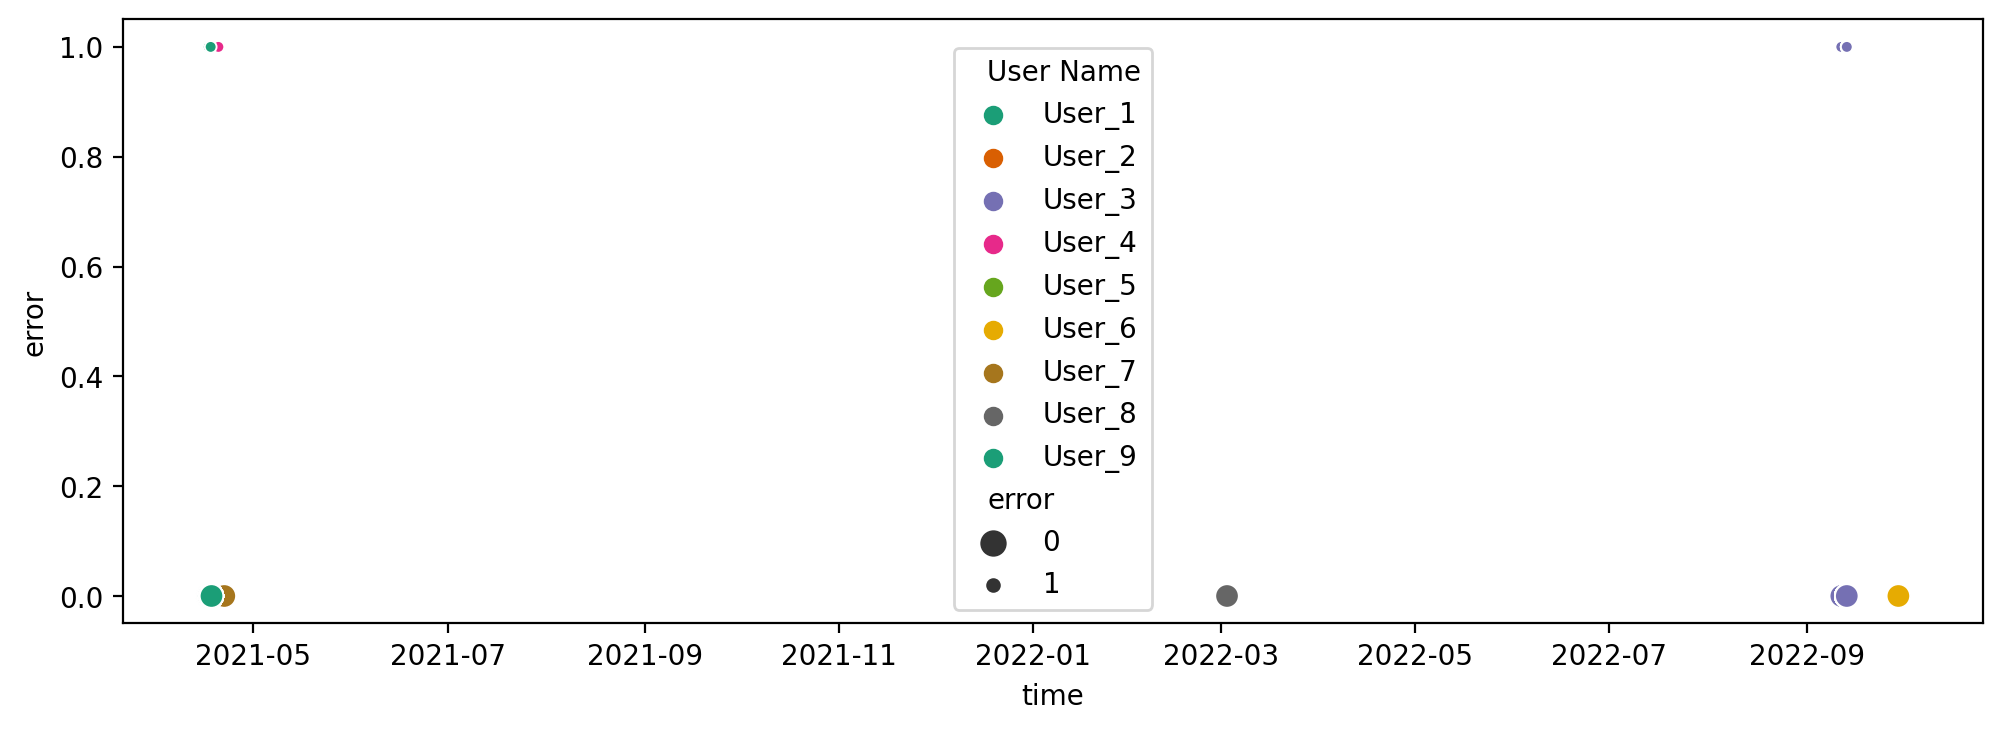

In [91]:
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(x="time", y="error", data=selected_data, hue="User Name", palette='Dark2', size='error')

array([[<AxesSubplot:title={'center':'User_1'}>,
        <AxesSubplot:title={'center':'User_2'}>],
       [<AxesSubplot:title={'center':'User_3'}>,
        <AxesSubplot:title={'center':'User_4'}>]], dtype=object)

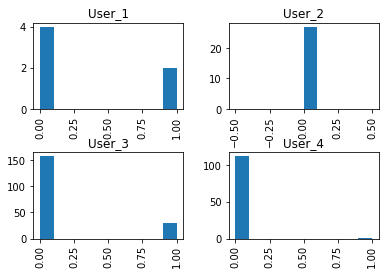

In [33]:
selected_data.hist(column="error", by="User Name")

## Error Timeline

array([<AxesSubplot:title={'center':'a8c71'}>,
       <AxesSubplot:title={'center':'a9321'}>], dtype=object)

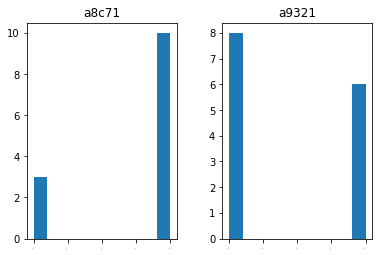

In [103]:
raw_data.hist(column="count_ls", by="Machine ID", xlabelsize=1)

## Error Type

In [142]:
error_type_data = raw_data.copy()
error_type_data.head()

,time,User Name,Machine ID,command,stderr,stdout,error
0,2021-04-19 19:34:00,User_1,10bcd15c,ls,,SuperShell\nstderr.txt,False
1,2021-04-19 19:35:00,User_1,10bcd15c,export,/home/supershell/.offline.sh: line 358: export...,,True
2,2021-04-19 19:35:00,User_1,10bcd15c,export,/home/supershell/.offline.sh: line 358: export...,,True
3,2021-04-19 19:36:00,User_1,10bcd15c,export,,,False
4,2021-04-19 19:36:00,User_1,10bcd15c,export,,,False


In [143]:
error_type_data = error_type_data[["time", "User Name", "command", "stderr"]]
error_type_data.head()

,time,User Name,command,stderr
0,2021-04-19 19:34:00,User_1,ls,
1,2021-04-19 19:35:00,User_1,export,/home/supershell/.offline.sh: line 358: export...
2,2021-04-19 19:35:00,User_1,export,/home/supershell/.offline.sh: line 358: export...
3,2021-04-19 19:36:00,User_1,export,
4,2021-04-19 19:36:00,User_1,export,


In [145]:
permission = re.compile(r'.*((P|p)ermission).*')
access_issue = re.compile(r'.*((A|a)ccess).*')
command_error = re.compile(r'.*((C|c)ommand).*')
typo_file_name = re.compile(r'.*((F|f)ile).*')
typo_directory_name = re.compile(r'.*((D|d)irectory).*')

In [146]:
def error_type(error):
    if permission.match(error):
        return "Permission Error"
    elif access_issue.match(error): 
        return "Access Error"
    elif command_error.match(error):
        return "Command Error"
    elif typo_file_name.match(error):
        return "File Name Typo"
    elif typo_directory_name.match(error):
        return "Directory Name Typo"
    else:
        return "No Error"

In [147]:
error_type_data["error type"] = error_type_data["stderr"].apply(lambda x: error_type(x))
error_type_data.head(100)

,time,User Name,command,stderr,error type
0,2021-04-19 19:34:00,User_1,ls,,No Error
1,2021-04-19 19:35:00,User_1,export,/home/supershell/.offline.sh: line 358: export...,No Error
2,2021-04-19 19:35:00,User_1,export,/home/supershell/.offline.sh: line 358: export...,No Error
3,2021-04-19 19:36:00,User_1,export,,No Error
4,2021-04-19 19:36:00,User_1,export,,No Error
...,...,...,...,...,...
95,2022-09-11 19:52:00,User_3,cd,,No Error
96,2022-09-11 19:52:00,User_3,ls,,No Error
97,2022-09-11 19:53:00,User_3,cd,,No Error
98,2022-09-11 19:53:00,User_3,ls,,No Error


In [148]:
error_type_data["error type"].value_counts()

No Error               429
File Name Typo          20
Access Error            13
Directory Name Typo      6
Command Error            4
Permission Error         1
Name: error type, dtype: int64

### Error Type Per User

In [149]:
for i in range(9):
    user_name = "User_" + str(i+1)
    print(user_name)
    print(error_type_data.loc[error_type_data["User Name"] == user_name]["error type"].value_counts(normalize=True))

User_1
No Error    1.0
Name: error type, dtype: float64
User_2
No Error    1.0
Name: error type, dtype: float64
User_3
No Error               0.834225
Access Error           0.064171
File Name Typo         0.064171
Directory Name Typo    0.021390
Command Error          0.010695
Permission Error       0.005348
Name: error type, dtype: float64
User_4
No Error               0.964602
Directory Name Typo    0.017699
File Name Typo         0.017699
Name: error type, dtype: float64
User_5
No Error    1.0
Name: error type, dtype: float64
User_6
No Error    1.0
Name: error type, dtype: float64
User_7
No Error    1.0
Name: error type, dtype: float64
User_8
No Error    1.0
Name: error type, dtype: float64
User_9
No Error          0.931818
File Name Typo    0.045455
Command Error     0.015152
Access Error      0.007576
Name: error type, dtype: float64
